# **Workforce_Attrition_Prediction** 

### The dataset is about employee attrition. This analysis can discover if any particular factors or patterns that lead to attrition. If so, employers can take certain precausion to prevent attrition which in employer of view, employee attrition is a loss to company, in both monetary and non-monetary. 

### **Import packages**

In [1]:
##Importing the packages
#Data processing packages
import numpy as np 
import pandas as pd 

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

#Machine Learning packages
from sklearn.svm import SVC,NuSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler	
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE

### **Import data**

In [2]:
#Import Employee Attrition data
data=pd.read_csv('Workforce_attrition_dataset.csv')

### **Check and remediate if there are any null values**

In [3]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**COMMENT:** Above output shows that there are No Null values.

### **Check and remove if there are any fields which does not add value**

In [5]:
data['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

**COMMENT:** From the above output ALL the employees are above 18, so this field does not add any value.

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**COMMENT:** Standard deviation(std) for the fields "EmployeeCount" and ."StandardHours" are ZERO.  Hence these fields does not add value, hence they can be removed.

In [7]:
#These fields does not add value, hence removed
data = data.drop(['EmployeeCount','Over18','DailyRate','HourlyRate','MonthlyRate','StandardHours'], axis = 1)

In [8]:
data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [9]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,3,4,1,6,3,3,2,2,2,2


### **Convert Categorical values to Numeric Values**

#### **Perform datatype conversion or translation wherever required**

"Attrition" field has values **Yes/No**, however for machin learning algorithms we need numeric values.
Hence translating **Yes/No** to binary **1/0**

In [10]:
#A lambda function is a small anonymous function.
#A lambda function can take any number of arguments, but can only have one expression.
# 0:No, 1: Yes
data['Attrition']=data['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

In [11]:
# Ensure column is string type and strip any spaces
data['BusinessTravel'] = data['BusinessTravel'].astype(str).str.strip()

# Convert categorical variable BusinessTravel to numerical values
# 0: Non-Travel, 1: Travel_Frequently, 2: Travel_Rarely
data['BusinessTravel'] = data['BusinessTravel'].apply(
    lambda x: 1 if x == 'Travel_Frequently' else (2 if x == 'Travel_Rarely' else 0)
)


In [12]:
# Convert categorical variables Department to numerical values
# 0: Sales, 1: Research & Development, 2: Human Resources
data['Department'] = data['Department'].apply(
    lambda x: 0 if x == 'Sales' else (1 if x == 'Research & Development' else 2)
)

In [13]:
# Convert categorical variables EducationField to numerical values
# 0: Life Sciences, 1: Medical, 2: Marketing, 3: Technical Degree, 4: Human Resources
data['EducationField'] = data['EducationField'].apply(
    lambda x: 0 if x == 'Life Sciences' else (1 if x == 'Medical' else (2 if x == 'Marketing' else (3 if x == 'Technical Degree' else 4)))
)

In [14]:
# Convert categorical values of Gender to numerical values
# 0: Male, 1: Female
data['Gender'] = data['Gender'].apply(
    lambda x: 0 if x == "Male" else 1
)

In [15]:
# Convert categorical variablesJobRole to numerical values
# 0: Sales Executive, 1: Research Scientist, 2: Laboratory Technician, 3: Manufacturing Director, 4: Healthcare Representative, 5: Manager, 6: Sales Representative, 7: Research Director
# 8: Human Resources 
data['JobRole']=data['JobRole'].apply(lambda x : 0 if x=='Sales Executive' else (1 if x=='Research Scientist' else (2 if x=='Laboratory Technician' else (3 if x=='Manufacturing Director' else (4 if x=='Healthcare Representative' else (5 if x=='Manager' else (6 if x=='Sales Representative' else (7 if x=='Research Director' else 8))))))))

In [16]:
# Convert categorical variables MaritalStatus to numerical values
# 0: Single, 1: Married, 2: Divorced
data['MaritalStatus']=data['MaritalStatus'].apply(lambda x : 0 if x=='Single' else (1 if x=='Married' else 2))

In [17]:
# Convert categorical variables OverTime to numerical values
# 0: No, 1: Yes
data['OverTime']=data['OverTime'].apply(lambda x : 0 if x=='No' else 1)

In [18]:
#This function is used to convert Categorical values to Numerical values
# data=pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   Department                1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EmployeeNumber            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobRole                   1470 non-null   int64
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

In [19]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,0,1,2,0,1,2,1,3,2,0,4,0,5993,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,1,8,1,0,2,3,0,2,2,1,2,1,5130,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1,2,2,4,4,4,0,2,1,2,3,0,2090,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1,3,4,0,5,4,1,3,1,1,3,1,2909,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,1,2,1,1,7,1,0,3,1,2,2,1,3468,9,0,12,3,4,1,6,3,3,2,2,2,2


**COMMENT:** It can be seen from the difference in the output of **data.head()** before and after the coversion that now **ALL the fields have numerical values.**

### **Function definition**

#### These functions will be used to prepare machine learning models

In [20]:
#Function to Train and Test Machine Learning Model
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

In [21]:
#Function to plot Confusion Matrix
def cm_plot(cm, model_name="Model"):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative', 'Positive']
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)

    # Add text annotations
    labels = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j, i, f"{labels[i][j]} = {cm[i][j]}", ha='center', va='center', color='black', fontsize=12)

    plt.colorbar()
    plt.tight_layout()
    plt.show()


## **Model Trained for 1_2_3**

#### Preparing data for ML model

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   Department                1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EmployeeNumber            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobRole                   1470 non-null   int64
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

In [23]:
# Step 1: Strip any spaces (safe practice)
data.columns = data.columns.str.strip()

# Step 2: Drop desired columns for 1_2_3
X = data.drop(['Attrition','Department', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis=1)
y = data['Attrition']
scaler= StandardScaler()  # Initialize the scaler
X = scaler.fit_transform(X)  # this returns a NumPy array


In [24]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

#### Training the ML model for required data

Epoch 1/60
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5026 - loss: 0.9508 - val_accuracy: 0.1395 - val_loss: 1.3454
Epoch 2/60
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5374 - loss: 0.6804 - val_accuracy: 0.2857 - val_loss: 1.2356
Epoch 3/60
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6308 - loss: 0.6081 - val_accuracy: 0.3265 - val_loss: 1.2378
Epoch 4/60
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6592 - loss: 0.5835 - val_accuracy: 0.3367 - val_loss: 1.2385
Epoch 5/60
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6738 - loss: 0.5688 - val_accuracy: 0.3503 - val_loss: 1.2275
Epoch 6/60
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6559 - loss: 0.5642 - val_accuracy: 0.3299 - val_loss: 1.2744
Epoch 7/60
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6872 - loss: 0.5494 - val_accuracy: 0.3912 - val_loss: 1.1435
Epoch 8/60
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7010 - loss: 0.5168 - val_accuracy:

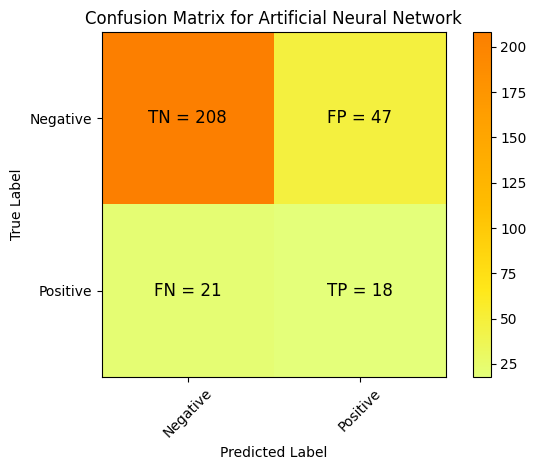

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       255
           1       0.28      0.46      0.35        39

    accuracy                           0.77       294
   macro avg       0.59      0.64      0.60       294
weighted avg       0.82      0.77      0.79       294

Scikit-Learn Accuracy: 76.87%


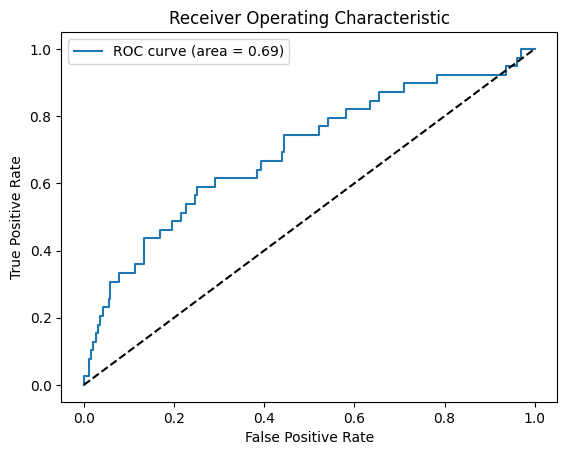

In [ ]:
# Model to be used for prediction Artificial Neural Network with accuracy 89.5%
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
cw_dict = dict(enumerate(class_weights))
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
model.fit(X_train, y_train, epochs=60, batch_size=19, validation_data=(X_test, y_test), class_weight=cw_dict)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Binarize output
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_plot(cm, "Artificial Neural Network")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"Scikit-Learn Accuracy: {acc * 100:.2f}%")
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()
# model.save('models/modela_1_2_3.h5')




## **Model trained for 1_2_3_4**

In [26]:
data.columns= data.columns.str.strip()
# Creating new data for prediction of 1_2_3_4
X_1_2_3_4 = data.drop(['Attrition', 'EnvironmentSatisfaction', 'JobSatisfaction', 'MonthlyIncome', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'], axis=1)
y_1_2_3_4 = data['Attrition']

In [27]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train_1_2_3_4, X_test_1_2_3_4, y_train_1_2_3_4, y_test_1_2_3_4 = train_test_split(X_1_2_3_4,y_1_2_3_4,test_size =0.2,random_state=42)

Epoch 1/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5234 - loss: 37.9427 - val_accuracy: 0.8299 - val_loss: 0.5053
Epoch 2/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5414 - loss: 1.1734 - val_accuracy: 0.3741 - val_loss: 1.2771
Epoch 3/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5427 - loss: 1.1558 - val_accuracy: 0.4660 - val_loss: 1.0220
Epoch 4/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5756 - loss: 0.8536 - val_accuracy: 0.3776 - val_loss: 1.2498
Epoch 5/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6140 - loss: 0.7691 - val_accuracy: 0.8027 - val_loss: 0.4449
Epoch 6/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6252 - loss: 0.7962 - val_accuracy: 0.4218 - val_loss: 1.0526
Epoch 7/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6383 - loss: 0.7040 - val_accuracy: 0.8503 - val_loss: 0.3975
Epoch 8/25
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6529 - loss: 0.7351 - val_accuracy: 0.8231 - val_loss

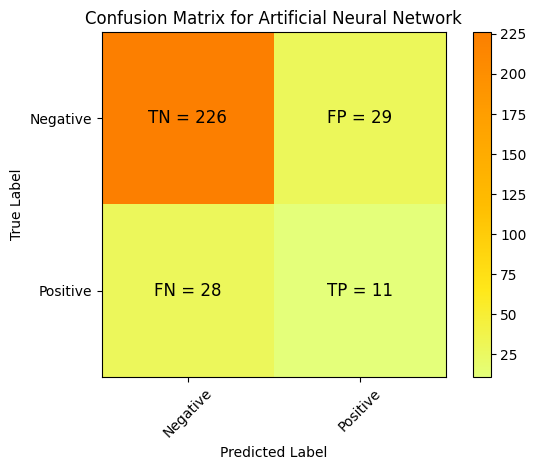

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       255
           1       0.28      0.28      0.28        39

    accuracy                           0.81       294
   macro avg       0.58      0.58      0.58       294
weighted avg       0.81      0.81      0.81       294

Scikit-Learn Accuracy: 80.61%


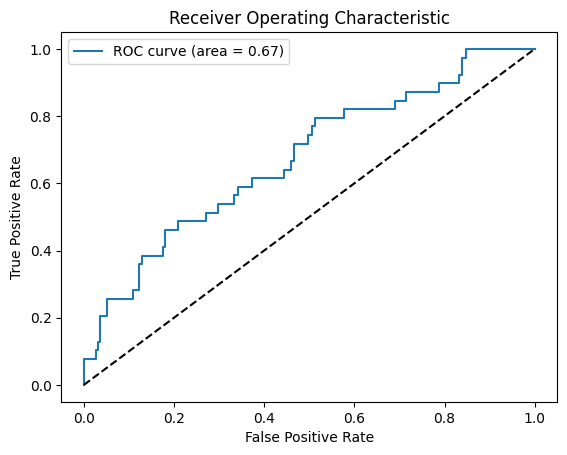

In [ ]:
# Training the model for 1_2_3_4
model = Sequential()
model.add(Dense(32, input_dim=X_train_1_2_3_4.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train_1_2_3_4),
                                                  y=y_train_1_2_3_4)
cw_dict = dict(enumerate(class_weights))
sm = SMOTE(random_state=42)
X_train_1_2_3_4, y_train_1_2_3_4 = sm.fit_resample(X_train_1_2_3_4, y_train_1_2_3_4)
model.fit(X_train_1_2_3_4, y_train_1_2_3_4, epochs=25, batch_size=21, validation_data=(X_test_1_2_3_4, y_test_1_2_3_4), class_weight=cw_dict)
y_pred_prob = model.predict(X_test_1_2_3_4)
y_pred = (y_pred_prob > 0.5).astype(int)  # Binarize output
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_1_2_3_4, y_pred)
cm_plot(cm, "Artificial Neural Network")
from sklearn.metrics import classification_report
print(classification_report(y_test_1_2_3_4, y_pred))
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_1_2_3_4, y_pred)
print(f"Scikit-Learn Accuracy: {acc * 100:.2f}%")
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_1_2_3_4, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()
# model.save('models/modela_1_2_3_4.h5')

## **Model trained for 1_2_3_5**

In [29]:
data.columns= data.columns.str.strip()
# Creating new data for prediction for 1_2_3_5
X_1_2_3_5 = data.drop(['Attrition', 'MonthlyIncome', 'PercentSalaryHike','Department','JobInvolvement','JobLevel', 'JobRole','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'StockOptionLevel'], axis=1)
y_1_2_3_5 = data['Attrition']

In [30]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train_1_2_3_5, X_test_1_2_3_5, y_train_1_2_3_5, y_test_1_2_3_5 = train_test_split(X_1_2_3_5,y_1_2_3_5,test_size =0.2,random_state=42)

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4914 - loss: 33.5437 - val_accuracy: 0.3844 - val_loss: 1.1072
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5668 - loss: 0.9431 - val_accuracy: 0.7551 - val_loss: 0.5281
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5583 - loss: 0.8449 - val_accuracy: 0.3571 - val_loss: 1.5534
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6086 - loss: 0.7767 - val_accuracy: 0.4864 - val_loss: 0.8528
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6493 - loss: 0.6355 - val_accuracy: 0.2381 - val_loss: 2.8537
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6538 - loss: 0.7461 - val_accuracy: 0.8367 - val_loss: 0.3934
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6591 - loss: 0.7837 - val_accuracy: 0.5476 - val_loss: 0.7690
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6938 - loss: 0.6362 - val_accuracy: 0

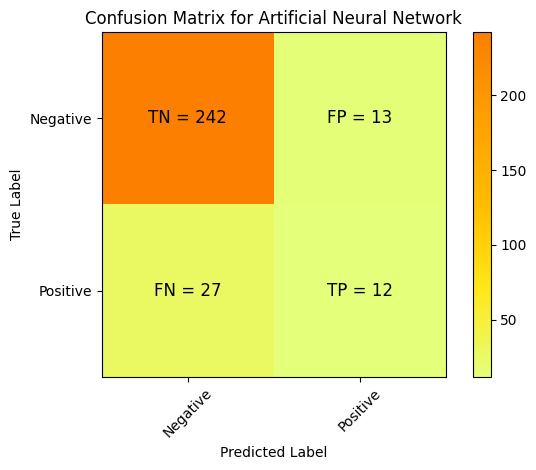

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       255
           1       0.48      0.31      0.38        39

    accuracy                           0.86       294
   macro avg       0.69      0.63      0.65       294
weighted avg       0.84      0.86      0.85       294

Scikit-Learn Accuracy: 86.39%


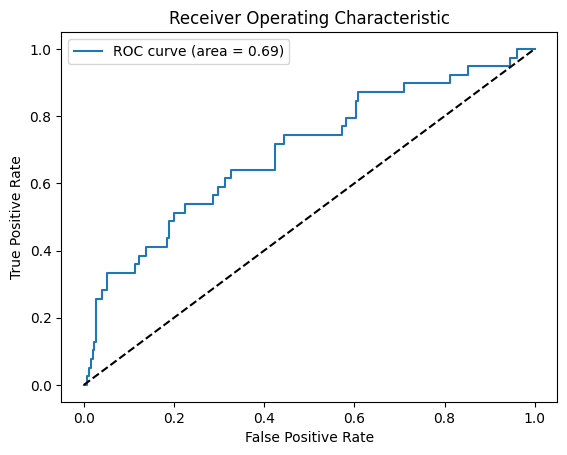

In [ ]:
# Training the model for 1_2_3_5
model = Sequential()
model.add(Dense(32, input_dim=X_train_1_2_3_5.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train_1_2_3_5),
                                                  y=y_train_1_2_3_5)
cw_dict = dict(enumerate(class_weights))
sm = SMOTE(random_state=42)
X_train_1_2_3_5, y_train_1_2_3_5 = sm.fit_resample(X_train_1_2_3_5, y_train_1_2_3_5)
model.fit(X_train_1_2_3_5, y_train_1_2_3_5, epochs=50, batch_size=16, validation_data=(X_test_1_2_3_5, y_test_1_2_3_5), class_weight=cw_dict)
y_pred_prob = model.predict(X_test_1_2_3_5)
y_pred = (y_pred_prob > 0.5).astype(int)  # Binarize output
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_1_2_3_5, y_pred)
cm_plot(cm, "Artificial Neural Network")
from sklearn.metrics import classification_report
print(classification_report(y_test_1_2_3_5, y_pred))
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_1_2_3_5, y_pred)
print(f"Scikit-Learn Accuracy: {acc * 100:.2f}%")
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()
# model.save('models/modela_1_2_3_5.h5')

## **Model trained for 1_2_3_6**

In [32]:
data.columns= data.columns.str.strip()
# Creating a new data for prediction for 1_2_3_6
X_1_2_3_6 = data.drop(['Attrition', 'Department', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'], axis=1)
y_1_2_3_6 = data['Attrition']

In [33]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train_1_2_3_6, X_test_1_2_3_6, y_train_1_2_3_6, y_test_1_2_3_6 = train_test_split(X_1_2_3_6,y_1_2_3_6,test_size =0.2,random_state=42)

Epoch 1/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5038 - loss: 148.8572 - val_accuracy: 0.6122 - val_loss: 1.4325
Epoch 2/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4941 - loss: 4.4522 - val_accuracy: 0.1327 - val_loss: 45.0035
Epoch 3/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5095 - loss: 8.7749 - val_accuracy: 0.8571 - val_loss: 2.3682
Epoch 4/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5575 - loss: 7.0064 - val_accuracy: 0.1497 - val_loss: 13.9109
Epoch 5/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5616 - loss: 4.0757 - val_accuracy: 0.8673 - val_loss: 4.0924
Epoch 6/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5579 - loss: 8.4949 - val_accuracy: 0.7891 - val_loss: 0.8358
Epoch 7/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5850 - loss: 4.0722 - val_accuracy: 0.8537 - val_loss: 2.9386
Epoch 8/25
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5563 - loss: 7.4734 - val_accuracy

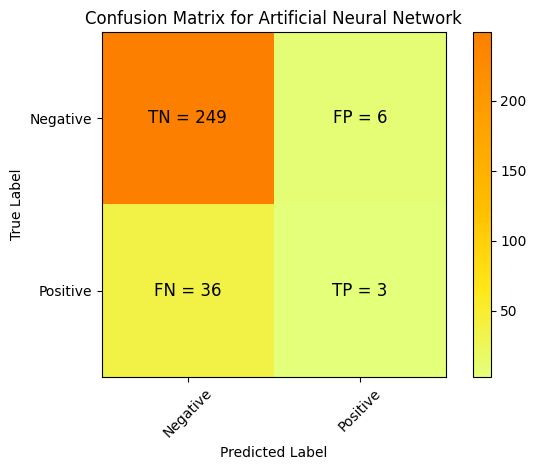

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.33      0.08      0.12        39

    accuracy                           0.86       294
   macro avg       0.60      0.53      0.52       294
weighted avg       0.80      0.86      0.82       294

Scikit-Learn Accuracy: 85.71%


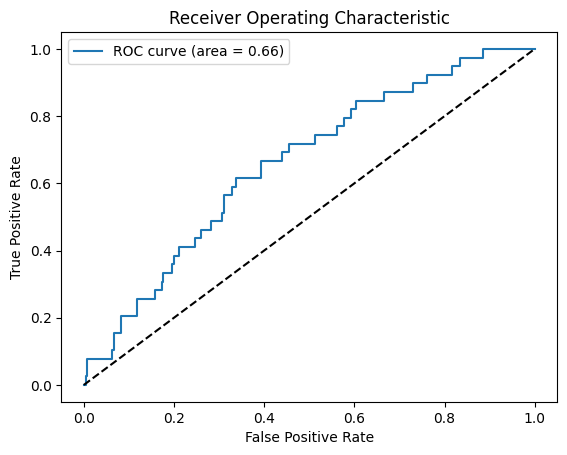

In [ ]:
# Training the model for 1_2_3_6
model = Sequential()
model.add(Dense(32, input_dim=X_train_1_2_3_6.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
cw_dict = dict(enumerate(class_weights))
sm = SMOTE(random_state=42)
X_train_1_2_3_6, y_train_1_2_3_6 = sm.fit_resample(X_train_1_2_3_6, y_train_1_2_3_6)
model.fit(X_train_1_2_3_6, y_train_1_2_3_6, epochs=25, batch_size=16, validation_data=(X_test_1_2_3_6, y_test_1_2_3_6), class_weight=cw_dict)
y_pred_prob = model.predict(X_test_1_2_3_6)
y_pred = (y_pred_prob > 0.5).astype(int)  # Binarize output
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_1_2_3_6, y_pred)
cm_plot(cm, "Artificial Neural Network")
from sklearn.metrics import classification_report
print(classification_report(y_test_1_2_3_6, y_pred))
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_1_2_3_6, y_pred)
print(f"Scikit-Learn Accuracy: {acc * 100:.2f}%")
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_1_2_3_6, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()
# model.save('models/modela_1_2_3_6.h5')

## **Model trained for 1_2_3_4_5**

In [35]:
data.columns= data.columns.str.strip()
# Creating new data for prediction of 1_2_3_4_5
X_1_2_3_4_5 = data.drop(['Attrition', 'MonthlyIncome', 'PercentSalaryHike','StockOptionLevel'], axis=1)
y_1_2_3_4_5 = data['Attrition']

In [36]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train_1_2_3_4_5, X_test_1_2_3_4_5, y_train_1_2_3_4_5, y_test_1_2_3_4_5 = train_test_split(X_1_2_3_4_5,y_1_2_3_4_5,test_size =0.2,random_state=42)

Epoch 1/175
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5202 - loss: 23.0480 - val_accuracy: 0.2993 - val_loss: 1.7215
Epoch 2/175
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5825 - loss: 0.9527 - val_accuracy: 0.7075 - val_loss: 0.5825
Epoch 3/175
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5867 - loss: 0.8209 - val_accuracy: 0.5034 - val_loss: 0.8434
Epoch 4/175
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6397 - loss: 0.7303 - val_accuracy: 0.5102 - val_loss: 0.8306
Epoch 5/175
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6891 - loss: 0.6044 - val_accuracy: 0.4252 - val_loss: 1.0431
Epoch 6/175
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6478 - loss: 0.6626 - val_accuracy: 0.7891 - val_loss: 0.4512
Epoch 7/175
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7298 - loss: 0.5611 - val_accuracy: 0.8435 - val_loss: 0.3956
Epoch 8/175
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7279 - loss: 0.5771 - val_acc

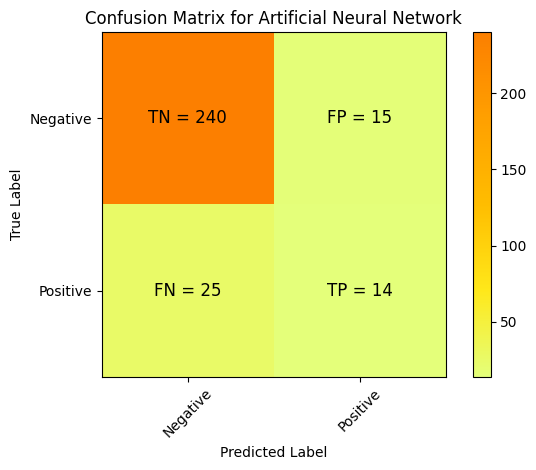

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       255
           1       0.48      0.36      0.41        39

    accuracy                           0.86       294
   macro avg       0.69      0.65      0.67       294
weighted avg       0.85      0.86      0.86       294

Scikit-Learn Accuracy: 86.39%


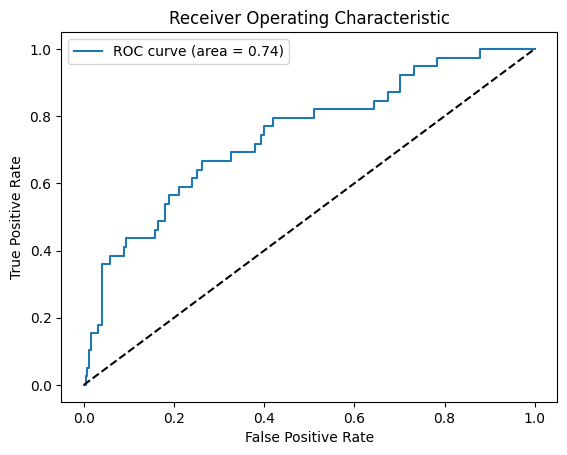

In [ ]:
# Training the model for 1_2_3_4_5
model = Sequential()
model.add(Dense(32, input_dim=X_train_1_2_3_4_5.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train_1_2_3_4_5),
                                                  y=y_train_1_2_3_4_5)
cw_dict = dict(enumerate(class_weights))
sm = SMOTE(random_state=42)
X_train_1_2_3_4_5, y_train_1_2_3_4_5 = sm.fit_resample(X_train_1_2_3_4_5, y_train_1_2_3_4_5)
model.fit(X_train_1_2_3_4_5, y_train_1_2_3_4_5, epochs=175, batch_size=16, validation_data=(X_test_1_2_3_4_5, y_test_1_2_3_4_5), class_weight=cw_dict)
y_pred_prob = model.predict(X_test_1_2_3_4_5)
y_pred = (y_pred_prob > 0.5).astype(int)  # Binarize output
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_1_2_3_4_5, y_pred)
cm_plot(cm, "Artificial Neural Network")
from sklearn.metrics import classification_report
print(classification_report(y_test_1_2_3_4_5, y_pred))
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_1_2_3_4_5, y_pred)
print(f"Scikit-Learn Accuracy: {acc * 100:.2f}%")
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_1_2_3_4_5, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()
# model.save('models/modela_1_2_3_4_5.h5')

## **Model trained for 1_2_3_4_6**

In [38]:
X_1_2_3_4_6= data.drop(['Attrition', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance'], axis=1)
y_1_2_3_4_6 = data['Attrition']

In [39]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train_1_2_3_4_6, X_test_1_2_3_4_6, y_train_1_2_3_4_6, y_test_1_2_3_4_6 = train_test_split(X_1_2_3_4_6,y_1_2_3_4_6,test_size =0.2,random_state=42)

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5607 - loss: 69.0933 - val_accuracy: 0.7789 - val_loss: 4.1239
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5591 - loss: 7.0955 - val_accuracy: 0.2483 - val_loss: 3.5433
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5689 - loss: 2.2350 - val_accuracy: 0.8197 - val_loss: 0.8625
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5370 - loss: 5.1450 - val_accuracy: 0.1327 - val_loss: 12.8884
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5498 - loss: 4.4328 - val_accuracy: 0.8435 - val_loss: 1.5995
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5821 - loss: 3.0279 - val_accuracy: 0.8537 - val_loss: 1.4873
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5694 - loss: 3.0449 - val_accuracy: 0.5884 - val_loss: 1.1890
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5892 - loss: 2.8128 - val_accuracy: 

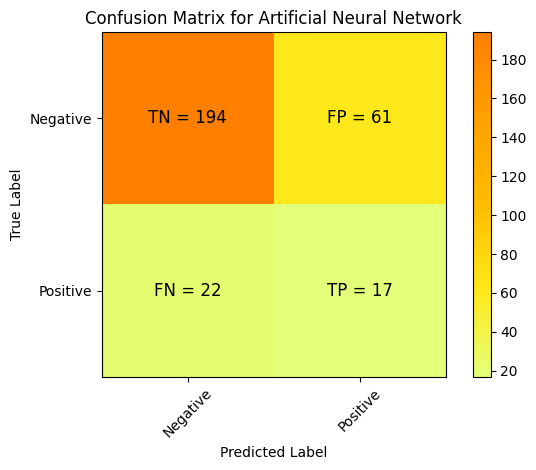

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       255
           1       0.22      0.44      0.29        39

    accuracy                           0.72       294
   macro avg       0.56      0.60      0.56       294
weighted avg       0.81      0.72      0.75       294

Scikit-Learn Accuracy: 71.77%


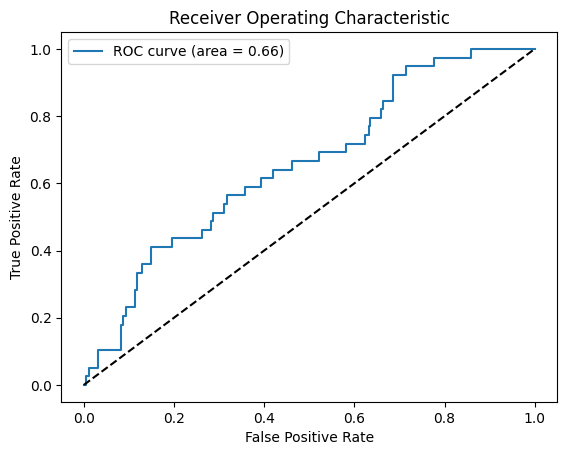

In [ ]:
# Training the model for 1_2_3_4_6
model = Sequential()
model.add(Dense(32, input_dim=X_train_1_2_3_4_6.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train_1_2_3_4_6),
                                                  y=y_train_1_2_3_4_6)
cw_dict = dict(enumerate(class_weights))
sm = SMOTE(random_state=42)
X_train_1_2_3_4_6, y_train_1_2_3_4_6 = sm.fit_resample(X_train_1_2_3_4_6, y_train_1_2_3_4_6)
model.fit(X_train_1_2_3_4_6, y_train_1_2_3_4_6, epochs=50, batch_size=16, validation_data=(X_test_1_2_3_4_6, y_test_1_2_3_4_6), class_weight=cw_dict)
y_pred_prob = model.predict(X_test_1_2_3_4_6)
y_pred = (y_pred_prob > 0.5).astype(int)  # Binarize output
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_1_2_3_4_6, y_pred)
cm_plot(cm, "Artificial Neural Network")
from sklearn.metrics import classification_report
print(classification_report(y_test_1_2_3_4_6, y_pred))
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_1_2_3_4_6, y_pred)
print(f"Scikit-Learn Accuracy: {acc * 100:.2f}%")
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_1_2_3_4_6, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()
# model.save('models/modela_1_2_3_4_6.h5')

## **Model trained for 1_2_3_5_6**

In [41]:
# Creating new data for prediction of 1_2_3_5_6
X_1_2_3_5_6 = data.drop(['Attrition','Department','JobInvolvement','JobLevel', 'JobRole','YearsAtCompany','YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager'], axis=1)
y_1_2_3_5_6 = data['Attrition']

In [42]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train_1_2_3_5_6, X_test_1_2_3_5_6, y_train_1_2_3_5_6, y_test_1_2_3_5_6 = train_test_split(X_1_2_3_5_6,y_1_2_3_5_6,test_size =0.2,random_state=42)

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4955 - loss: 510.7184 - val_accuracy: 0.4218 - val_loss: 2.1793
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5416 - loss: 1.9017 - val_accuracy: 0.1361 - val_loss: 5.3933
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5250 - loss: 1.9257 - val_accuracy: 0.6429 - val_loss: 0.7779
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5600 - loss: 1.9651 - val_accuracy: 0.7347 - val_loss: 0.8950
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5845 - loss: 1.8761 - val_accuracy: 0.8265 - val_loss: 0.8820
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5777 - loss: 1.7638 - val_accuracy: 0.8673 - val_loss: 1.3267
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5333 - loss: 3.4708 - val_accuracy: 0.8605 - val_loss: 0.9049
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5884 - loss: 2.3149 - val_accuracy: 

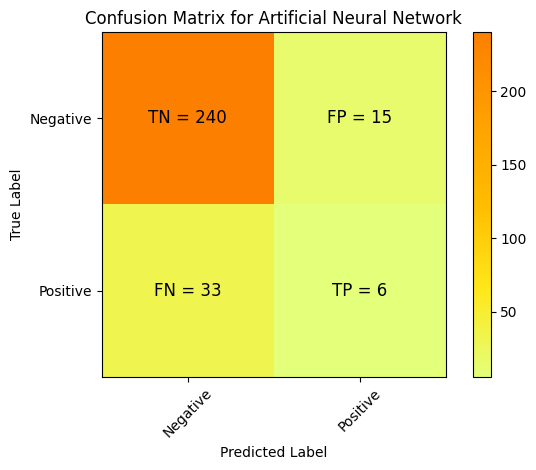

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       255
           1       0.29      0.15      0.20        39

    accuracy                           0.84       294
   macro avg       0.58      0.55      0.55       294
weighted avg       0.80      0.84      0.82       294

Scikit-Learn Accuracy: 83.67%


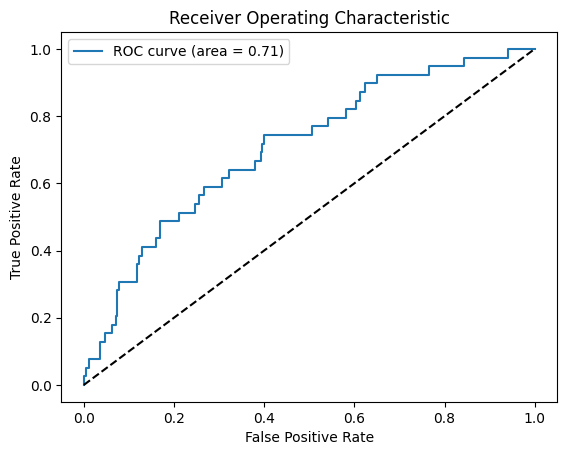

In [ ]:
# Training the model for 1_2_3_5_6
model = Sequential()
model.add(Dense(32, input_dim=X_train_1_2_3_5_6.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train_1_2_3_5_6),
                                                  y=y_train_1_2_3_5_6)
cw_dict = dict(enumerate(class_weights))
sm = SMOTE(random_state=42)
X_train_1_2_3_5_6, y_train_1_2_3_5_6 = sm.fit_resample(X_train_1_2_3_5_6, y_train_1_2_3_5_6)
# Keep class_weight
model.fit(X_train_1_2_3_5_6, y_train_1_2_3_5_6,
          epochs=50,
          batch_size=16,
          validation_data=(X_test_1_2_3_5_6, y_test_1_2_3_5_6),
          class_weight=cw_dict)

y_pred_prob = model.predict(X_test_1_2_3_5_6)
y_pred = (y_pred_prob > 0.5).astype(int)  # Binarize output
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_1_2_3_5_6, y_pred)
cm_plot(cm, "Artificial Neural Network")
from sklearn.metrics import classification_report
print(classification_report(y_test_1_2_3_5_6, y_pred))
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_1_2_3_5_6, y_pred)
print(f"Scikit-Learn Accuracy: {acc * 100:.2f}%")
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_1_2_3_5_6, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()
# model.save('models/modela_1_2_3_5_6.h5')

## **Model trained for 1_2_3_4_5_6**

In [44]:
data.columns= data.columns.str.strip()
#Separating Feature and Target matrices
X_1_2_3_4_5_6 = data.drop(['Attrition'], axis=1)
y_1_2_3_4_5_6 =data['Attrition']

In [45]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train_1_2_3_4_5_6, X_test_1_2_3_4_5_6, y_train_1_2_3_4_5_6, y_test_1_2_3_4_5_6 = train_test_split(X_1_2_3_4_5_6,y_1_2_3_4_5_6,test_size =0.2,random_state=42)

Epoch 1/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5015 - loss: 221.0586 - val_accuracy: 0.8605 - val_loss: 4.7899
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5379 - loss: 8.4096 - val_accuracy: 0.4762 - val_loss: 2.2522
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6061 - loss: 4.3233 - val_accuracy: 0.8639 - val_loss: 2.1056
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5735 - loss: 4.3514 - val_accuracy: 0.8639 - val_loss: 1.6966
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5758 - loss: 3.9478 - val_accuracy: 0.1429 - val_loss: 10.5182
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6032 - loss: 4.3926 - val_accuracy: 0.3129 - val_loss: 3.9781
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5938 - loss: 5.5440 - val_accuracy: 0.6224 - val_loss: 2.1562
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6156 - loss: 3.3179 - val_accuracy:

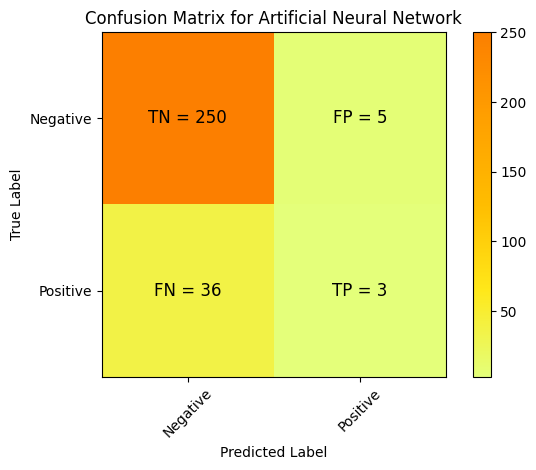

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.38      0.08      0.13        39

    accuracy                           0.86       294
   macro avg       0.62      0.53      0.53       294
weighted avg       0.81      0.86      0.82       294

Scikit-Learn Accuracy: 86.05%


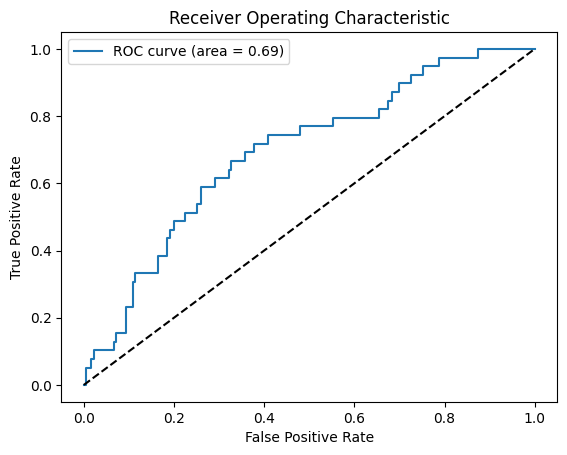

In [ ]:
# Training the model for 1_2_3_4_5_6
model = Sequential()
model.add(Dense(32, input_dim=X_train_1_2_3_4_5_6.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train_1_2_3_4_5_6),
                                                  y=y_train_1_2_3_4_5_6)
cw_dict = dict(enumerate(class_weights))
sm = SMOTE(random_state=42)
X_train_1_2_3_4_5_6, y_train_1_2_3_4_5_6 = sm.fit_resample(X_train_1_2_3_4_5_6, y_train_1_2_3_4_5_6)
model.fit(X_train_1_2_3_4_5_6, y_train_1_2_3_4_5_6, epochs=20, batch_size=16, validation_data=(X_test_1_2_3_4_5_6, y_test_1_2_3_4_5_6), class_weight=cw_dict)
y_pred_prob = model.predict(X_test_1_2_3_4_5_6)
y_pred = (y_pred_prob > 0.5).astype(int)  # Binarize output
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_1_2_3_4_5_6, y_pred)
cm_plot(cm, "Artificial Neural Network")
from sklearn.metrics import classification_report
print(classification_report(y_test_1_2_3_4_5_6, y_pred))
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_1_2_3_4_5_6, y_pred)
print(f"Scikit-Learn Accuracy: {acc * 100:.2f}%")
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_1_2_3_4_5_6, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()
# model.save('models/modela_1_2_3_4_5_6.h5')